In [5]:
import numpy as np
import pandas as pd
import matplotlib
import cv2 as cv
import tensorflow as tf
from tensorflow import keras, cast
import matplotlib.pyplot as plt
import math

In [6]:
cnn = tf.keras.models.load_model('kitchen.h5')

In [7]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      9280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 80)        414800    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)      

1/1 [==============================] - 0s 12ms/step


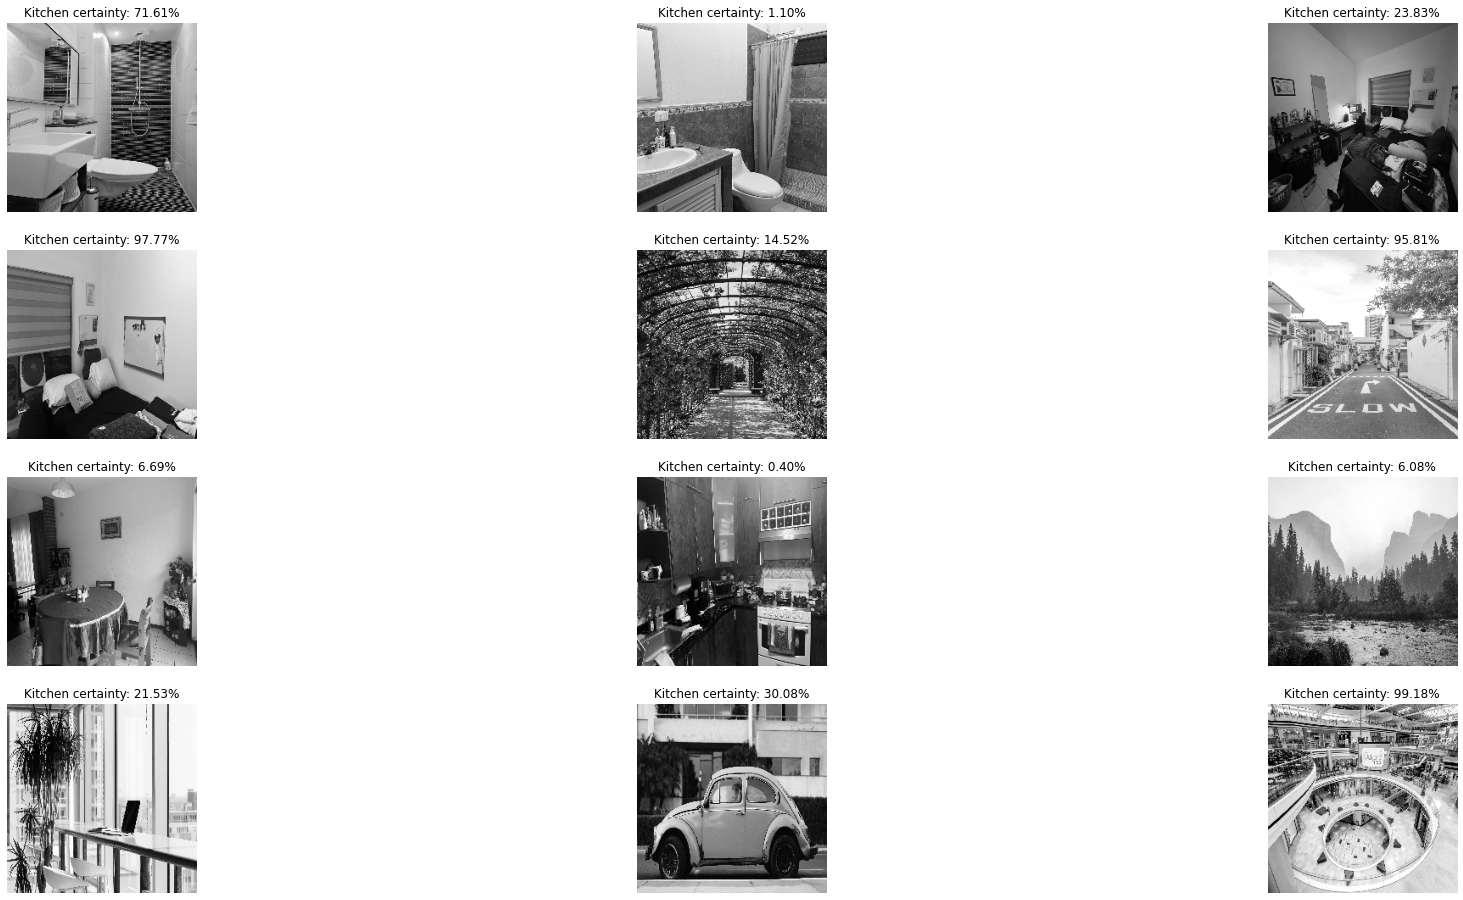

In [8]:
images_array = [
    '../test_real_images/bathroom_google.jpg',
    '../test_real_images/bathroom.png',
    '../test_real_images/bedroom_real.jpeg',
    '../test_real_images/bedroom_real_1.jpeg',
    '../test_real_images/garden.jpg',
    '../test_real_images/street.jpg',
    '../test_real_images/dining.png',
    '../test_real_images/kitchen_1.png',
    '../test_real_images/landscape.jpg',
    '../test_real_images/office.jpg',
    '../test_real_images/car.jpg',
    '../test_real_images/mall.png',
]

IMAGE_CHANNEL = 1

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

images_array= [prepare(img) for img in images_array]
plt.figure(figsize=(32, 16))
for i in range(len(images_array)):
  predicted = cnn.predict(images_array[i])
  ax = plt.subplot(4, 3, i+1)
  plt.imshow(images_array[i].reshape((224,224)).astype('uint8'), cmap='gray')
  plt.title(f"Kitchen certainty: {predicted[0][0]*100:.2f}%")
  plt.axis('off')

plt.show()

In [9]:
import h5py
import json
filename = 'kitchen.h5'
model_h5 = h5py.File(filename, 'r')

model_config = model_h5["/"].attrs["model_config"]
config_dict = json.loads(model_config)

In [10]:
# print(config_dict["config"]["layers"][i]['class_name']) for i in 
for i in config_dict['config']['layers']:
    if i['class_name'] == 'Dropout':
        print(i)

{'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.15, 'noise_shape': None, 'seed': None}}
{'class_name': 'Dropout', 'config': {'name': 'dropout_1', 'trainable': True, 'dtype': 'float32', 'rate': 0.05, 'noise_shape': None, 'seed': None}}
